In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('predict_house.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [7]:
df.shape

(50000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [9]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [10]:
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
pd.unique(df['Neighborhood'])

array([0, 1, 2])

In [11]:
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


In [12]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,0.815838,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,0.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,0.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,2021.000000,492195.259972


<Axes: >

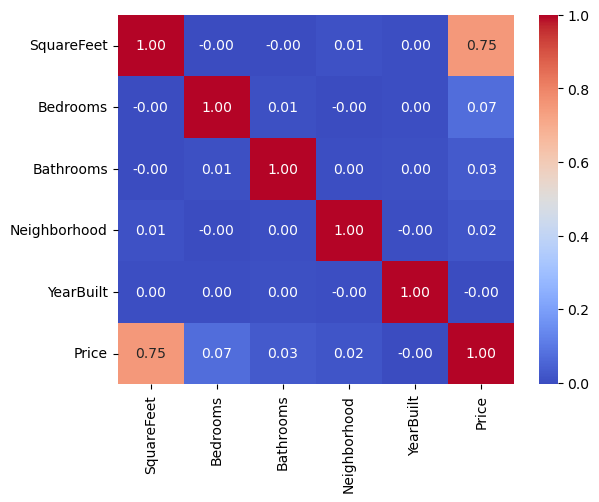

In [32]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

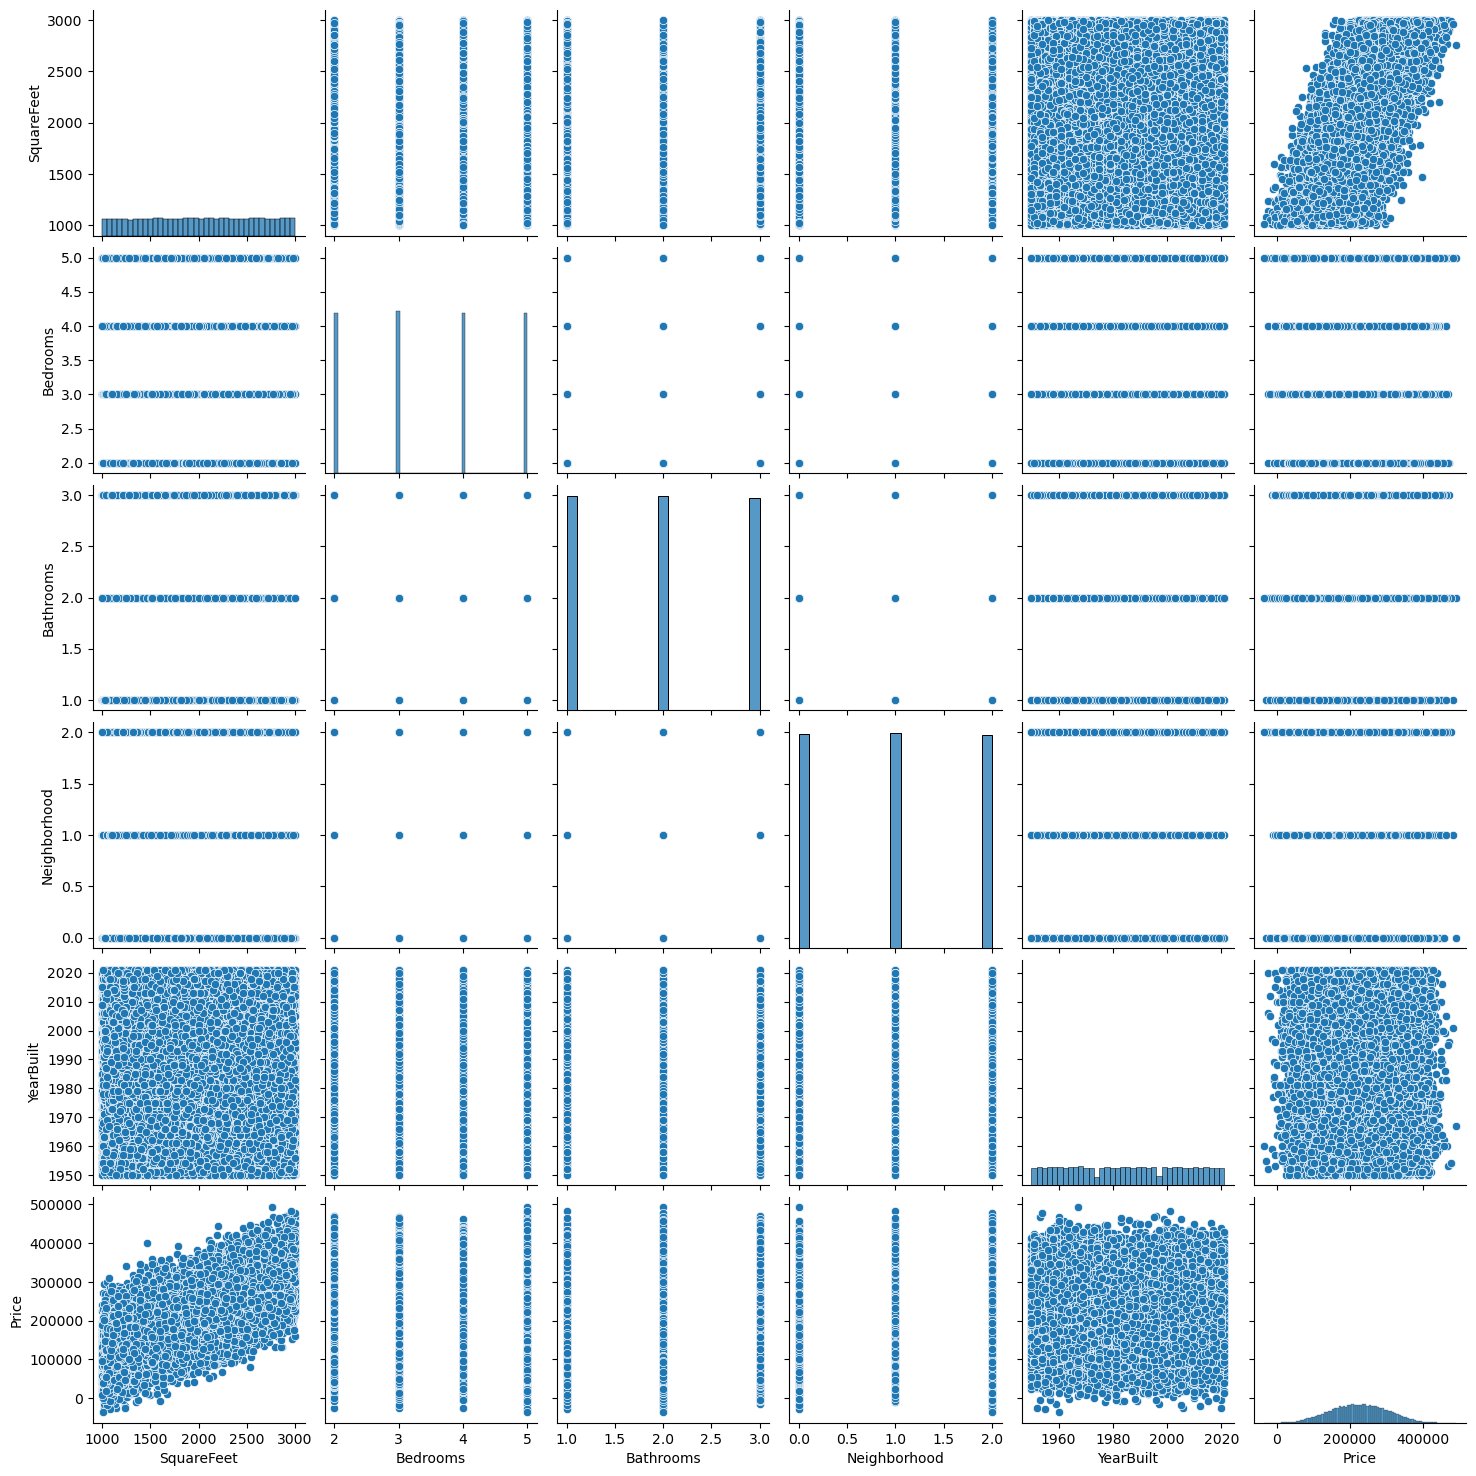

In [14]:
sns.pairplot(df)

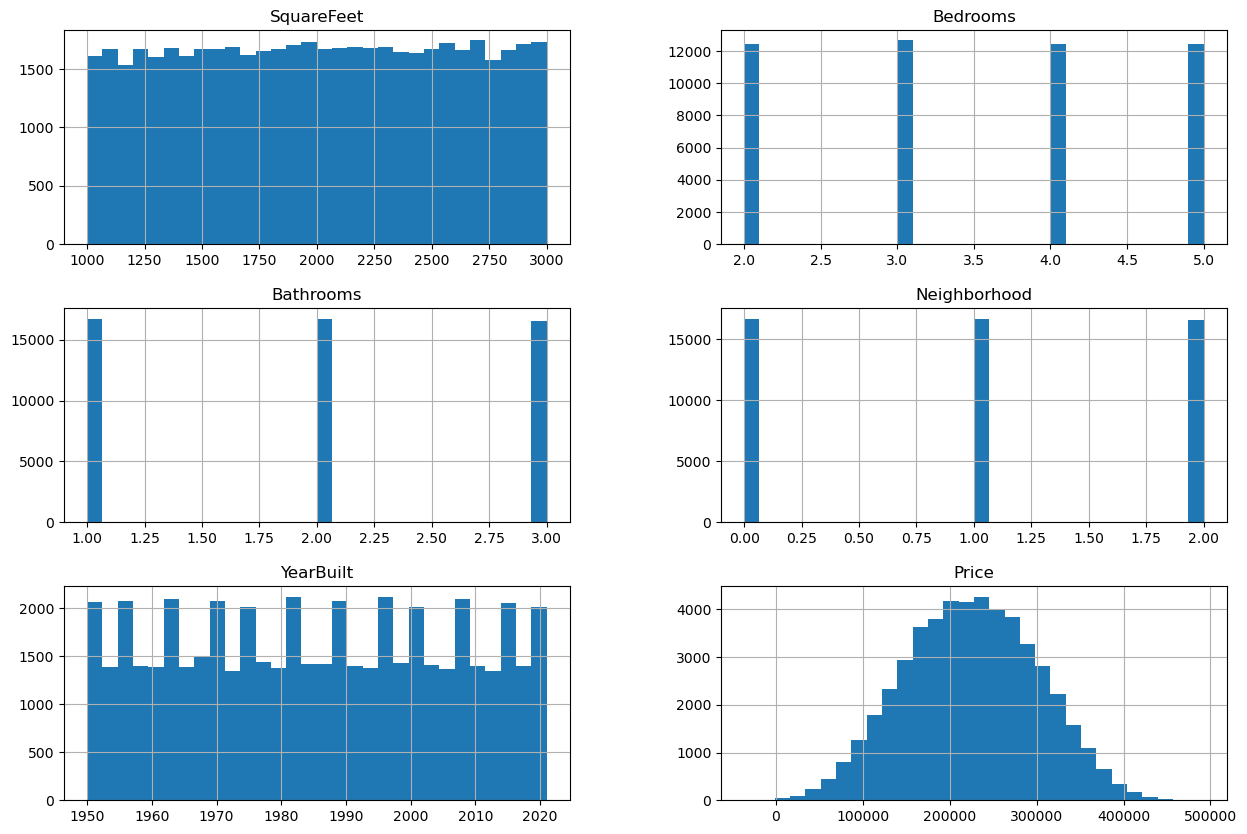

In [30]:
df.hist(bins=30, figsize=(15,10))
plt.show()

In [32]:
#train test
x = df.iloc[:,0:3]
y = df['Price']
ss = StandardScaler()
X = ss.fit_transform(x)
X

array([[ 0.20786058,  0.44906695, -1.22011292],
       [ 0.78648033, -0.44673786,  0.00561383],
       [-0.25434018, -1.34254267, -1.22011292],
       ...,
       [ 1.6900307 ,  1.34487176,  1.23134057],
       [ 1.0245311 ,  1.34487176,  0.00561383],
       [-0.75476808,  1.34487176,  1.23134057]])

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = True)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000, 3)
(40000,)
(10000, 3)
(10000,)


In [35]:
#LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
#prediksi
y_pred = lr.predict(X_test)
slope = lr.coef_
intercept = lr.intercept_
mse = mean_squared_error(y_test,y_pred)
print("Slope: ",slope)
print("Intercept: ",intercept)
print("Mean Squared Error: ",mse)

Slope:  [57207.72539514  5610.63995445  2130.49451955]
Intercept:  224809.4143978373
Mean Squared Error:  2590663902.125326


In [37]:
X_uni = df['SquareFeet']
X_uni = X_uni.values.reshape(-1,1)
y_uni = df['Price']
y_uni = y_uni.values.reshape(-1,1)

In [38]:
X_uni_train,X_uni_test,y_uni_train,y_uni_test = train_test_split(X_uni,y_uni,test_size = 0.2,shuffle = True)

In [39]:
lr_uni = LinearRegression()
lr_uni.fit(X_uni_train,y_uni_train)
y_uni_pred = lr_uni.predict(y_uni_test)
slope_uni = lr_uni.coef_
intercept_uni = lr_uni.intercept_
mse_uni = mean_squared_error(y_uni_test,y_uni_pred)
print("Slope: ",slope_uni)
print("Intercept: ",intercept_uni)
print("Mean Squared Error: ",mse_uni)

Slope:  [[99.14396312]]
Intercept:  [25803.2945397]
Mean Squared Error:  547288599679324.4


In [40]:
alpha = 1.0
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train,y_train)
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)
print(f"Training Mean Square Error: {train_mse}")
print(f"Testing Mean Square Error: {test_mse}")
print(f"Model Coefficient: {ridge_model.coef_}")

Training Mean Square Error: 2468039873.3250365
Testing Mean Square Error: 2590663730.68888
Model Coefficient: [57206.28965514  5610.49486284  2130.43194676]


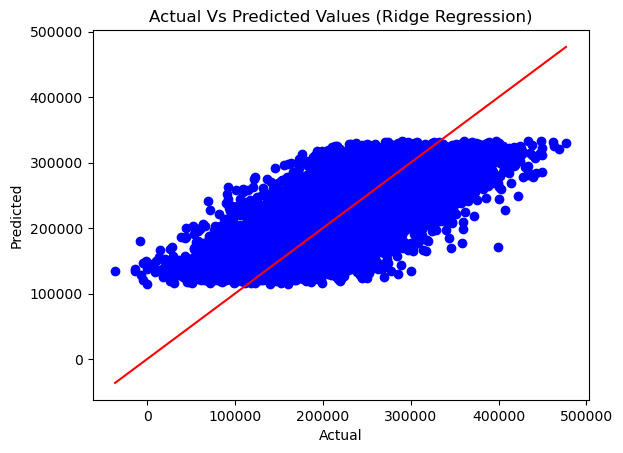

In [50]:
plt.scatter(y_test,y_pred_test,color = "blue")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted Values (Ridge Regression)")
plt.show()

In [58]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 2590663902.125326
r_square_value : 0.5636947214609399


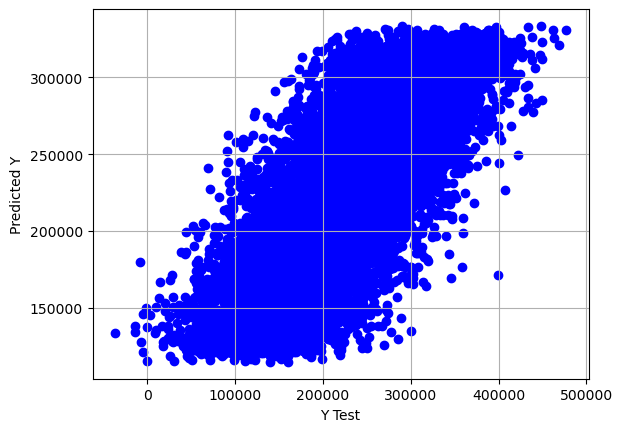

In [56]:
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

<Axes: ylabel='Count'>

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


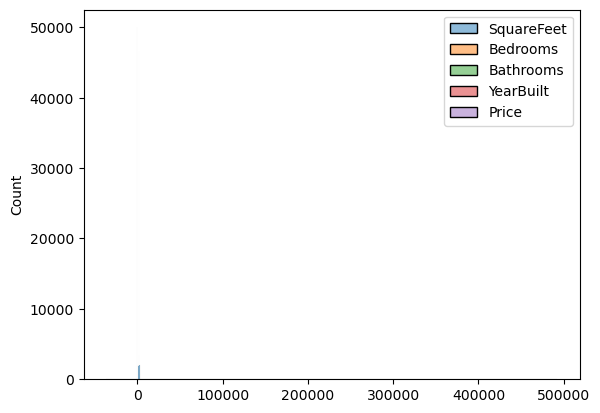

In [6]:
sns.histplot(df)